# Deep Learning
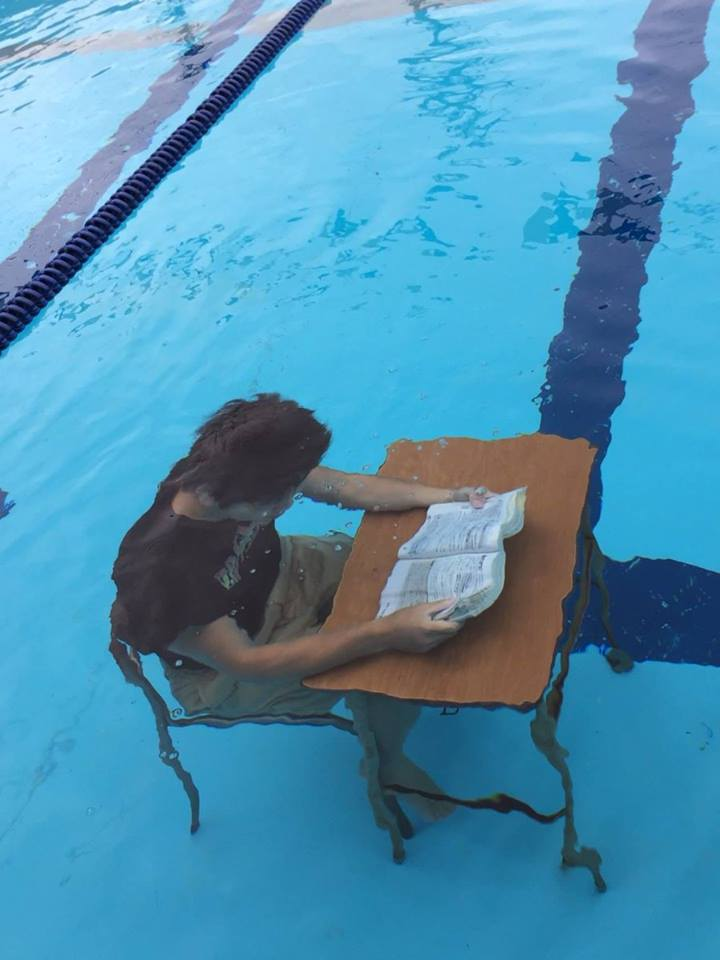

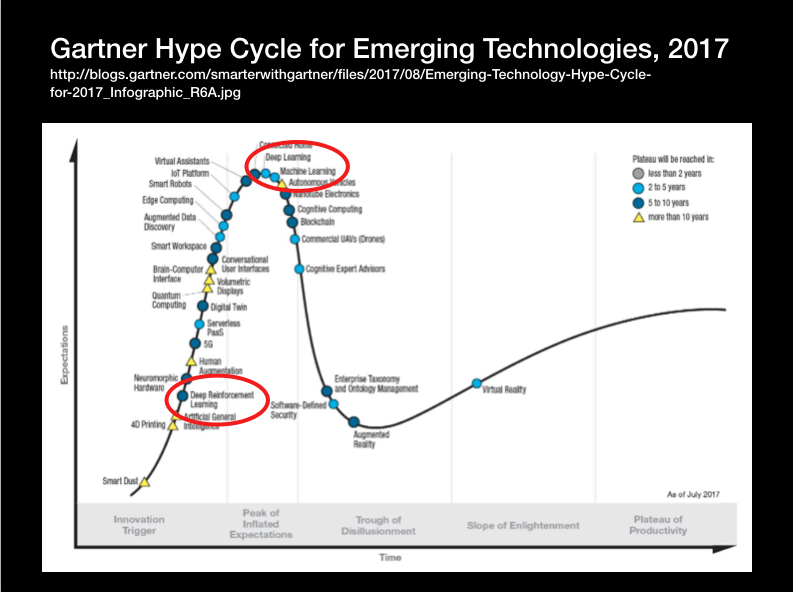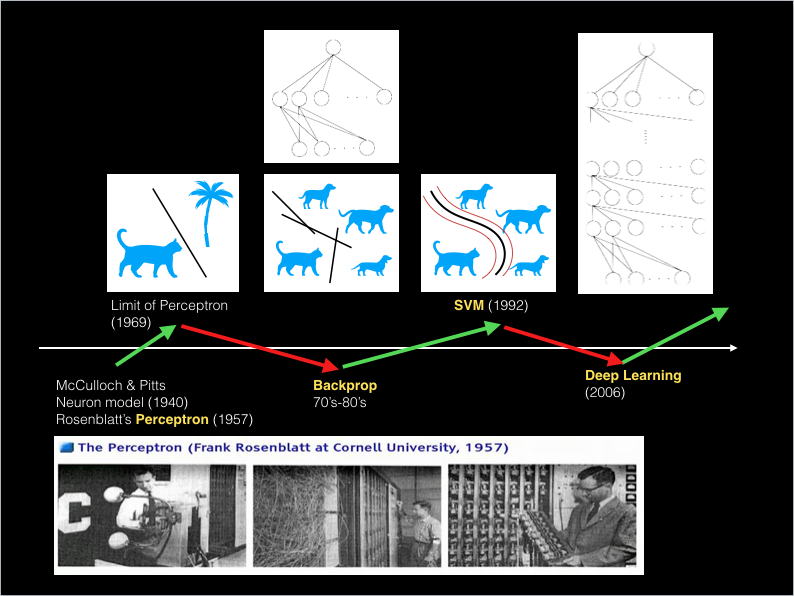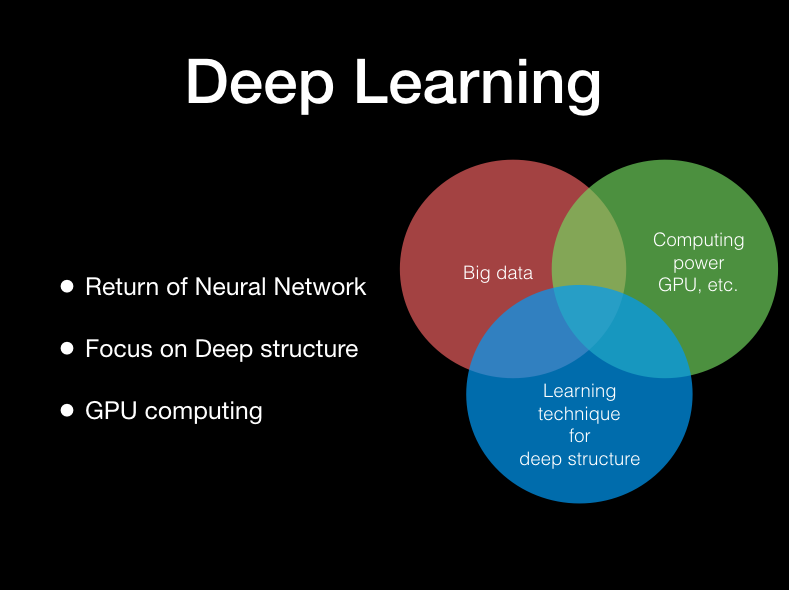

First load data in CSV format then use sklearn to split into trainning set and test set

In [16]:
import os
import numpy as np
np.random.seed(1234)  # for reproducibility  

from keras.models import Sequential
from keras.layers import Dense

# Load CSV
import numpy
filename = 'pima-indians-diabetes.data'
raw_data = open(filename, 'rt')
data = numpy.loadtxt(raw_data, delimiter=",")
print(data.shape)

X = data[:,0:8]
y = data[:,8:9].reshape(data.shape[0])

mean = [ 3.8, 120.9, 69.1, 20.5, 79.8, 32.0, 0.5, 33.2 ]
sd   = [ 3.4, 32.0, 19.4, 16.0, 115.2, 7.9, 0.3, 11.8 ]
X = (X-mean)/sd

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)

(768, 9)
(576, 8) (576,)


## Basic structure of NN is called Multi-Layer Perceptron or MLP
-  NN composed of __layers__, each layer is composed of __nodes__
-  Nodes on successive layers are connected
-  This structure is called __fully connected (fc)__ or __dense__
-  Each node $i$ on layer $l$ computes 
  -  $o^l_i = \sum_j w^l_{ij} s^{l-1}_j + b^l_i$
  -  $s^l_i = f(o^l_i)$
  -  $f$ is an _activation function_
      - __Linear__ $f(x) = x$
      - __Sigmoid__ or __logistic__ $f(x) = 1/(1+\exp(-x))$
      - __Hyperbolic tangent__ $f(x) = \tanh(x)$
      - __Rectified Linear Unit__ $f(x) = \max\{0, x\}$
-  Parameters are $w^l_{ij}$ and $b^l_i$
-  Training==adjusting these parameters
-  Normally, NN training is __supervised__
-  Number of input nodes = number of features
-  For classification
    -  Number of output nodes = number of classes
        -  For multiple output nodes, we output index of node with largest output value
    -  For 2-class, we can use 1 single node

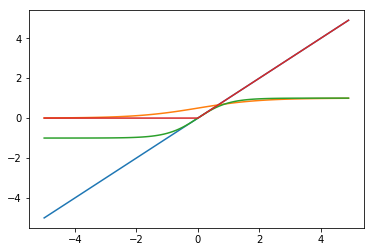

In [11]:
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

lin = x
sigm = 1./(1+np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(x, 0)

plt.plot(x,lin , label='linear')
plt.plot(x,sigm, label='sigmoid')
plt.plot(x,tanh, label='tanh')
plt.plot(x,relu, label='relu')

In [12]:
mlp = Sequential()
mlp.add( Dense(100, input_dim=8, activation='sigmoid') )
mlp.add( Dense(1, activation='sigmoid') )

print(mlp.summary()) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
None


-  Training == Adjusting these 1001 parameters
-  How to train == using __gradient__
-  __Gradient__ is vector of _partial derivatives_
-  __Gradient__ gives direction of change that _increases_ the value of a _function_

-  Example: find $x$ that minimizes $f(x) = x^2$
    - $f'(x) = 2x$
    - 1st solution solve $f'(x)=0$
    - 2nd solution, start with $x^{(0)}$ then update $x^{(t+1)} = x^{(t)} - f'(x)$
    - 2' solution, split the update components into _direction_ and _step size_ $x^{(t+1)} = x^{(t)} - \eta \frac{f'(x)}{|f'(x)|}$

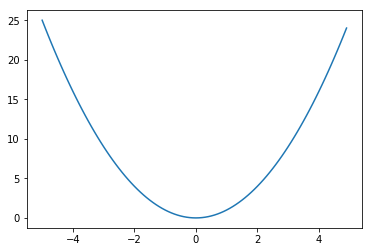

In [13]:
x = np.arange(-5, 5, 0.1)

y = x**2
plt.plot(x,y)

-  In Keras, we always _minimize_ some _loss function_
-  If a loss function $L$ has parameters $w_1, ..., w_n$
    -  Partial derivatives $\frac{\partial L}{\partial w_i}, i=1,...,n$
    -  Gradient is vector of these partial derivatives
    -  We often consider vector of parameters $w = [w_1, ..., w_n]^T$ and write the gradient as $\frac{\partial L}{\partial w} = [\frac{\partial L}{\partial w_1}, ..., \frac{\partial L}{\partial w_n}]^T$
    -  Suppose that we have training set $(x_1,y_1), ..., (x_n,y_n)$ where $x_t \in \mathbb{R}^d$ and $y_t \in \mathbb{R}$ and our loss function $L$ is composed of parameter $w \in \mathbb{R}^d$
        -  What is the dimension of $\frac{\partial L}{\partial w}$?
        -  Suppose that $\frac{\partial L}{\partial w} = \sum_t y_t x_t$, $\frac{\partial L}{\partial w_i} = $?

In [18]:
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

-  We have 2 classes 0 and 1
-  We use 1 output node with sigmoid unit 
    -  Output can be _interpreted_ as posterior probability of class 1
-  This NN is _suitable_ for traiing with __binary cross-entropy__
    -  Use when _each output node_ can be interpreted as posterior probability
    -  Normally, use with sigmoid units

In [19]:
mlp.fit(X_train, y_train, batch_size=64, epochs=1, verbose=1)
sc = mlp.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', sc[1])

Epoch 1/1
576/576 [==============================] - 1s 1ms/step - loss: 0.7519 - acc: 0.3767
Test accuracy: 0.5


### Exercise
-  Construct MLP with 50 hidden units and compute the test accuracy
-  Construct MLP 50-50-1 with ReLU and compute the test accuracy

## MNIST dataset

In [49]:
from keras.datasets import mnist

# load data and reshape the Tensors
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

X_train = X_train.astype(np.float32).reshape((X_train.shape[0],28*28)) / 255.0
X_test  = X_test.astype(np.float32).reshape((X_test.shape[0],28*28)) / 255.0
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [25]:
from keras.utils import np_utils
print(y_train.shape)

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000,)
(60000, 10)


## Exercise
-  Construct MLP 1000-10 with __softmax__ on output layer
-  $o^L_i = \sum_j w^L_{ij} s^{L-1}_j + b^L_i$
-  $s^L_i = \frac{\exp(o^L_i)}{\sum_j \exp(o^L_j)}$
    -  What is the difference between using this softmax and simple linear function?
-  Compile with __categorical_crossentropy__ 

In [26]:
mlp = Sequential()

...

mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
mlp.fit(X_train, Y_train, batch_size=64, epochs=5, verbose=1)
score = mlp.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1092 - acc: 0.9690
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0953 - acc: 0.9731
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0831 - acc: 0.9771
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0725 - acc: 0.9800
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0649 - acc: 0.9823
Test accuracy: 0.9708


## Classical ML technique: SVM
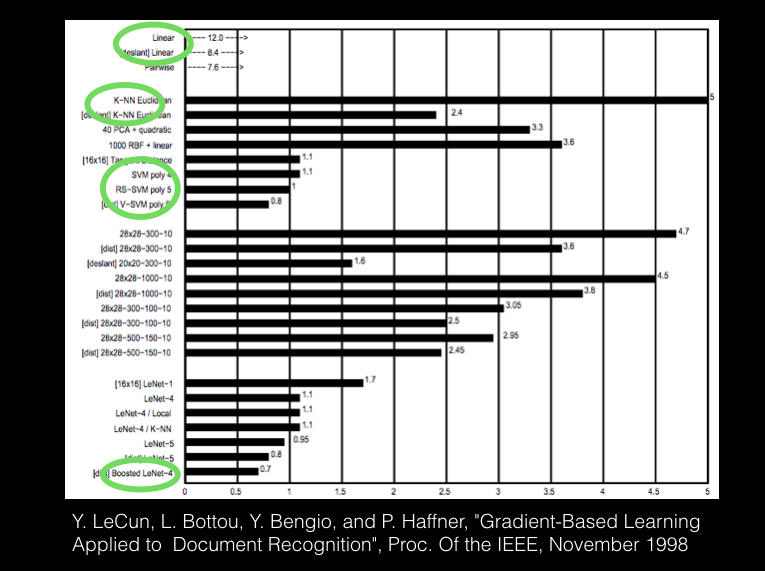

In [31]:
from sklearn.svm import SVC

svm = SVC(C=10.0, kernel='rbf', gamma=0.0015)
svm.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0015, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svm.score(X_test, y_test)

0.9637

# CNN
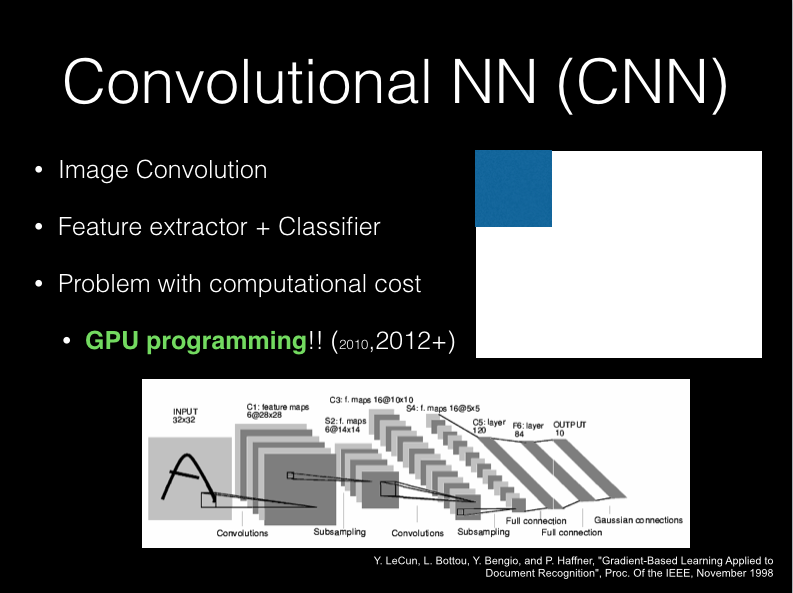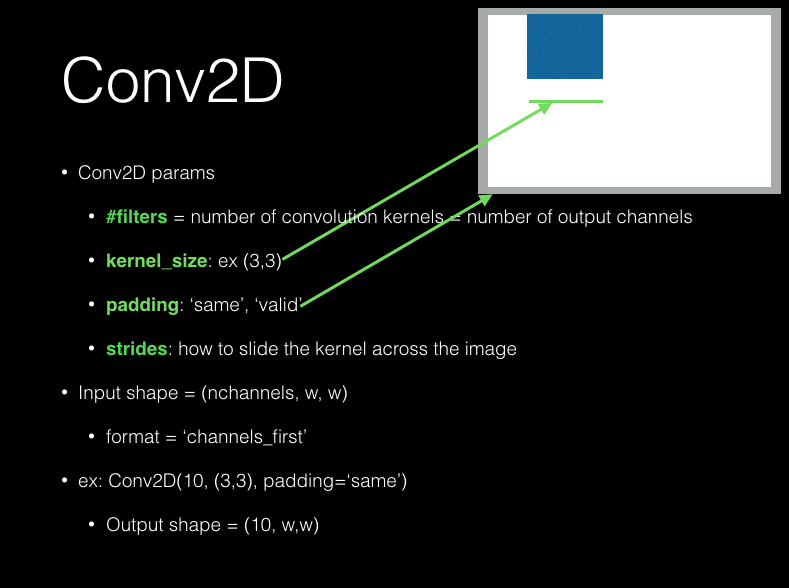

In [34]:
from keras.layers import (Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten)

cnn = Sequential()
cnn.add( Conv2D(10, (3,3), padding='same', use_bias=False, data_format='channels_last', input_shape=(28,28,1)) )
cnn.add( BatchNormalization(axis=-1) )
cnn.add( Activation('relu') )
cnn.add( MaxPooling2D(pool_size=(2,2), data_format='channels_last') )
cnn.add( Conv2D(10, (3,3), padding='same', use_bias=False, data_format='channels_last') )
cnn.add( BatchNormalization(axis=-1) )
cnn.add( Activation('relu') )
cnn.add( Conv2D(10, (3,3), padding='same', use_bias=False, data_format='channels_last') )
cnn.add( BatchNormalization(axis=-1) )
cnn.add( Activation('relu') )
cnn.add( Flatten() )
cnn.add( Dense(10, activation='softmax') )
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [54]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test  = X_test.reshape((X_test.shape[0], 28,28,1))

In [36]:
print(cnn.summary())

cnn.fit(X_train, Y_train, batch_size=64, epochs=5, verbose=1)
score = cnn.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 10)        900       
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 10)        0         
__________

### Exercise: Modify CNN structure and see the result

## Food VS Non-Food
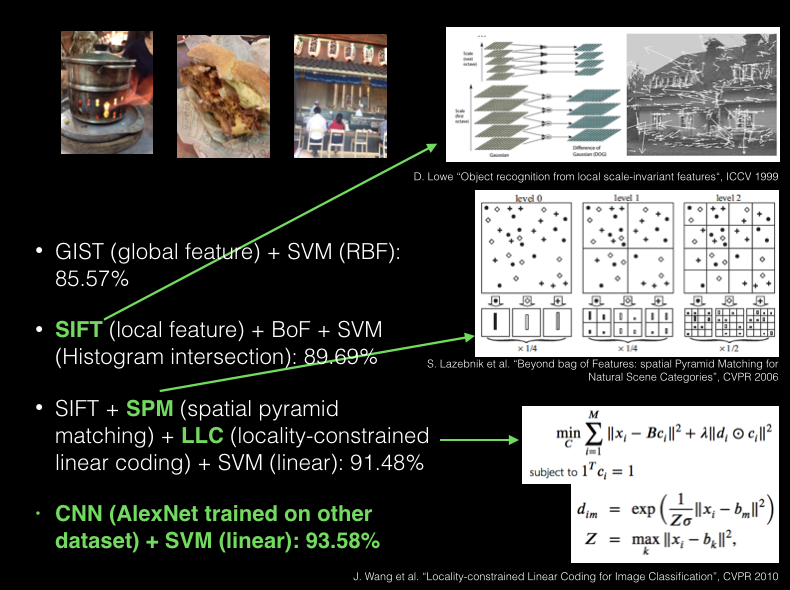

## Using deep features
-  For _similar task_
-  Normally Deep features are used with linear SVM
-  Use deep feature with other classifier.
-  Add new layer and train
-  What if we want something similar to SVM?

In [50]:
y0 = np.array(y_train)

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [52]:
y0[y0!=0] = 20
y0[y0==0] = 1
y0[y0==20] = 0

y0[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [56]:
from keras.models import Model

feat_extractor = Model(inputs=cnn.inputs, outputs=cnn.layers[-2].output)

mod = Sequential()
mod.add( feat_extractor )
mod.add( Dense(1, activation='sigmoid') )

mod.layers[0].trainable = False
mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(mod.summary())

mod.fit(X_train, y0, batch_size=64, epochs=5, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 1960)              2010      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1961      
Total params: 3,971
Trainable params: 1,961
Non-trainable params: 2,010
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 35s 584us/step - loss: 0.0225 - acc: 0.9927
Epoch 2/5
60000/60000 [==============================] - 35s 584us/step - loss: 0.0062 - acc: 0.9982
Epoch 3/5
60000/60000 [==============================] - 35s 581us/step - loss: 0.0047 - acc: 0.9986
Epoch 4/5
60000/60000 [==============================] - 36s 600us/step - loss: 0.0037 - acc: 0.9988
Epoch 5/5
60000/60000 [==============================] - 37s 622us/step - loss: 0.0033 - acc: 0.9990


In [58]:
y0t = np.array(y_test)
y0t[y0t!=0] = 20
y0t[y0t==0] = 1
y0t[y0t==20] = 0
y0t[:10]

mod.evaluate(X_test, y0t)

10000/10000 [==============================] - 6s 623us/step


[0.004965240183685819, 0.9984]

## Implementing SVM-like model
-  Linear SVM problem $\min \|w\|^2$ subject to $y_t (w^T x_t + b) \ge 1, t=1,...,n$
    -  Do not forget that for SVM, the class label is either 1 or -1
-  Equivalent to __regularized hinge loss__ $\min \sum_t \max\{1-y_t (w^T x_t + b), 0\} + C \|w\|^2$
-  So SVM-like model can be implemented using __hinge loss__ with __l2 regularization__

In [63]:
y0 = np.array(y_train)
y0[y0!=0] = -1
y0[y0==0] = 1

from keras import regularizers
mod2 = Sequential()
mod2.add( feat_extractor )
mod2.add( Dense(1, activation='tanh', kernel_regularizer=regularizers.l2(0.01)) )

mod2.layers[0].trainable = False
mod2.compile(loss='hinge', optimizer='adam', metrics=['binary_accuracy'])
print(mod2.summary())

mod2.fit(X_train, y0, batch_size=64, epochs=5, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 1960)              2010      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1961      
Total params: 3,971
Trainable params: 1,961
Non-trainable params: 2,010
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 35s 580us/step - loss: 0.0458 - binary_accuracy: 0.0986
Epoch 2/5
60000/60000 [==============================] - 33s 548us/step - loss: 0.0141 - binary_accuracy: 0.0987
Epoch 3/5
60000/60000 [==============================] - 30s 498us/step - loss: 0.0107 - binary_accuracy: 0.0987
Epoch 4/5
60000/60000 [==============================] - 34s 561us/step - loss: 0.0078 - binary_accuracy: 0.0987
Epoch 5/5
60000/60000 [==============================] - 35s 587us/step - l

### Seems to be bug in hinge loss!

In [66]:
y0t = np.array(y_test)
y0t[y0t!=0] = -1
y0t[y0t==0] = 1

pred = mod2.predict(X_test)
p = pred[0]*y0t

acc = 100. * p[p>0].shape[0]/y_test.shape[0]
print(acc)

100.0


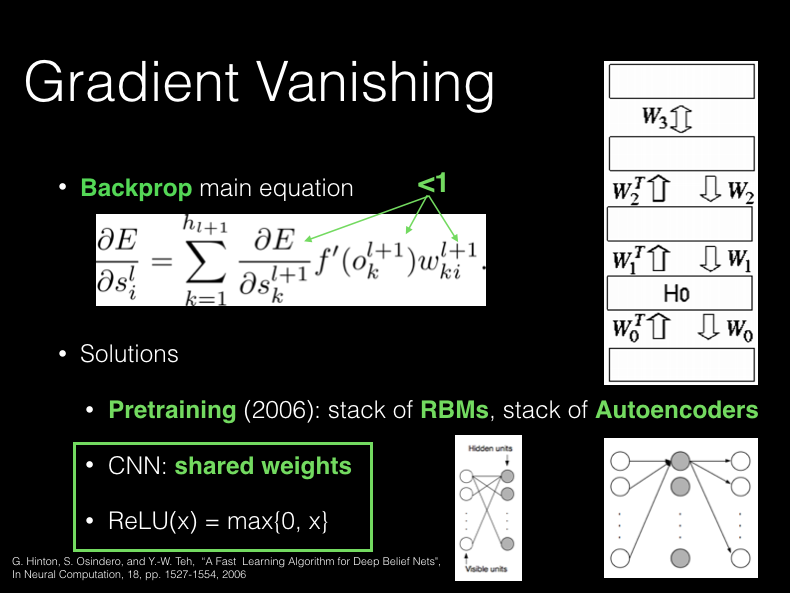

## Autoencoder
-  NN with 1 hidden layer. The number of node on output layer is equal to that of input layer
-  The NN is trained to _reconstruct_ the input data
-  If all activations were linear, then it is similar to PCA
-  No Autoencoder in Keras, so we need to implement by ourself
    -  Wuite Tricky! since the weights are _shared_ between hidden layer and output layer

In [118]:
from keras import backend as K
from keras.engine.topology import Layer
class Autoencoder(Layer):

    def __init__(self, hidden_dim, **kwargs):
        self.hidden_dim = hidden_dim
        super(Autoencoder, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='Auto',
                                      shape=(input_shape[1], self.hidden_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(Autoencoder, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        return K.sigmoid( K.dot( K.sigmoid(K.dot(x, self.kernel)), K.transpose( self.kernel ) ) )

    def compute_output_shape(self, input_shape):
        return input_shape

ae = Sequential()
ae.add( Autoencoder(10, input_shape=(784,)) )
ae.compile(loss='mean_squared_error', optimizer='adam')

X_train = X_train.reshape((X_train.shape[0],784))
ae.fit( X_train, X_train, batch_size=32, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.0918
Epoch 2/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.0621
Epoch 3/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0541
Epoch 4/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.0509
Epoch 5/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.0494
Epoch 6/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0486
Epoch 7/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0480
Epoch 8/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.0477
Epoch 9/100
60000/60000 [==============================] - 6s 108us/step - loss: 0.0475 0s - 
Epoch 10/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.0473
Epoch 11/100
60000/60000 [==============================] - 7s 110us/step - loss: 0.0472
Epoch 12/100
60000/60000

60000/60000 [==============================] - 6s 103us/step - loss: 0.0461
Epoch 94/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0461
Epoch 95/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.0461
Epoch 96/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0461
Epoch 97/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0461
Epoch 98/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.0461
Epoch 99/100
60000/60000 [==============================] - 7s 108us/step - loss: 0.0461
Epoch 100/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0460


In [79]:
w = ae.layers[0].get_weights()[0]

mod2 = Sequential()
mod2.add( Dense( 10, use_bias=False, weights=[w], activation='tanh', input_shape=(784,)) )
mod2.layers[-1].trainable = False
mod2.add( Autoencoder(20) )
mod2.add( Dense( 784, use_bias=False, weights=[np.transpose(w)], activation='tanh' ) )
mod2.layers[-1].trainable = False

print(mod2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7840      
_________________________________________________________________
autoencoder_4 (Autoencoder)  (None, 10)                200       
_________________________________________________________________
dense_20 (Dense)             (None, 784)               7840      
Total params: 15,880
Trainable params: 200
Non-trainable params: 15,680
_________________________________________________________________
None


In [119]:
w = ae.layers[0].get_weights()[0]

encoder = Sequential()
encoder.add( Dense(10, use_bias=False, weights=[w], activation='sigmoid', input_shape=(784,)) )

In [120]:
tmp = encoder.predict(X_train)

In [121]:
mu, sd = np.mean(tmp, axis=0), np.std(tmp, axis=0)

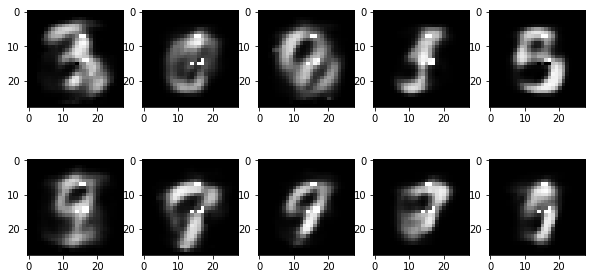

In [122]:
decoder = Sequential()
decoder.add( Dense(784, use_bias=False, weights=[np.transpose(w)], activation='sigmoid', input_shape=(10,)) )

ran = np.random.normal(mu,sd,size=[10,10])
gen = decoder.predict(ran)

fig = plt.figure(figsize=(10, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(gen[i].reshape((28,28)), cmap='gray')


## Building DeepID CNN - learn to use "Model"
-  Observe the size of feature maps
-  Tricky at the end
    -  We will use another constructor _Model_
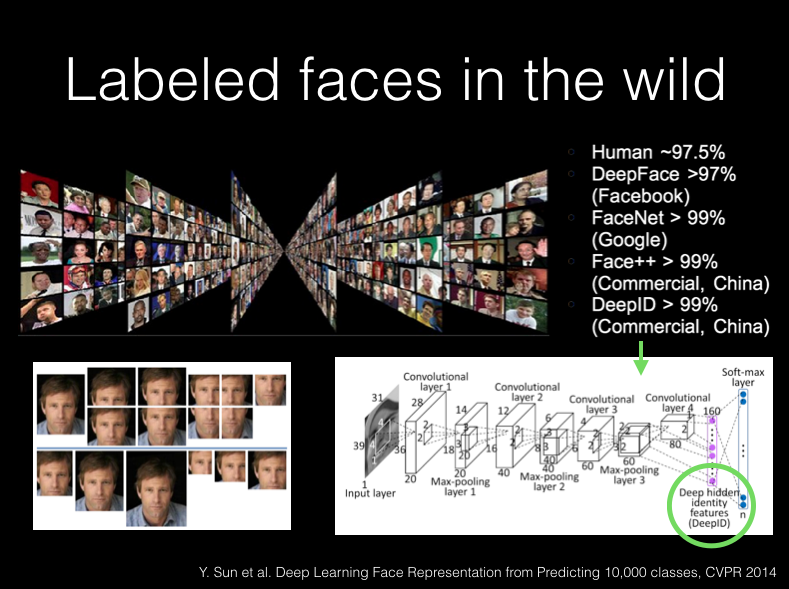

In [123]:
from keras.models import Model
from keras.layers import Input

def deepid_layerconv4( input_shape ):
    x = Input(shape=input_shape)
    y = Conv2D(80, (2,2), data_format='channels_last')(x)
    y = Flatten()(y)
    z = Flatten()(x)
    w = Concatenate()([y,z])
    r = Model(inputs=[x], outputs=[w])
    return r

deepid_cnn = Sequential()
...

-  Sequential is used when constructing simple NN
-  Model is used for fancy structure

In [125]:
# Equivalent models

mod1 = Sequential()
mod1.add( Conv2D(5, (3,3), input_shape=(28,28,1), activation='relu', data_format='channels_last') )

x = Input(shape=(28,28,1))
y = Conv2D(5, (3,3), input_shape=(28,28,1), activation='relu', data_format='channels_last')(x)
mod2 = Model(inputs=[x], outputs=[y])

print(mod1.summary())
print(mod2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 5)         50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 5)         50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
None


## ResNet - Model exercise
-  CNN with shared weights aleviates gradient vanishing
-  The problem still occurs and reveals when using very deep structure, e.g. >20 layers
-  __ResNet__ introduces _skip_ connection that allows gradient to flow back easier
-  We will use __Add__ instead of __Concatenate__
-  Construct simple ResNet for MNIST and compare performance with simple CNN used earlier
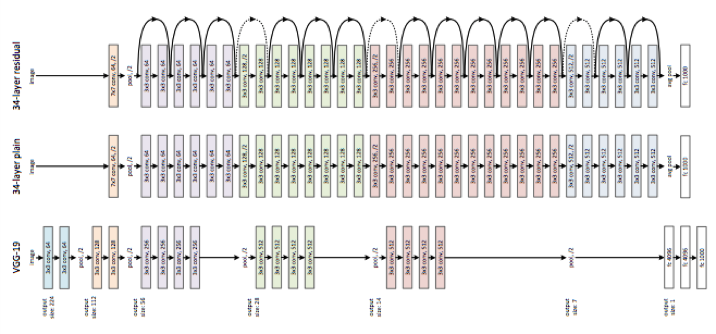
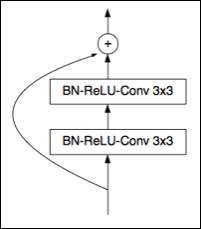

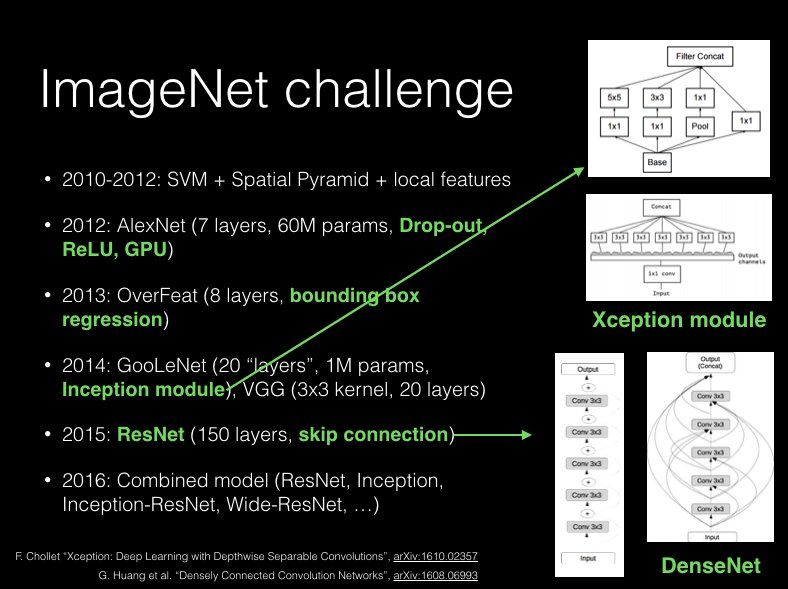

## U-Net - another Model exercise 
-  Useful for image segmentation
-  Multi-scale analysis
-  Normal CNN top layers have low resolution, U-Net tops have high resolution
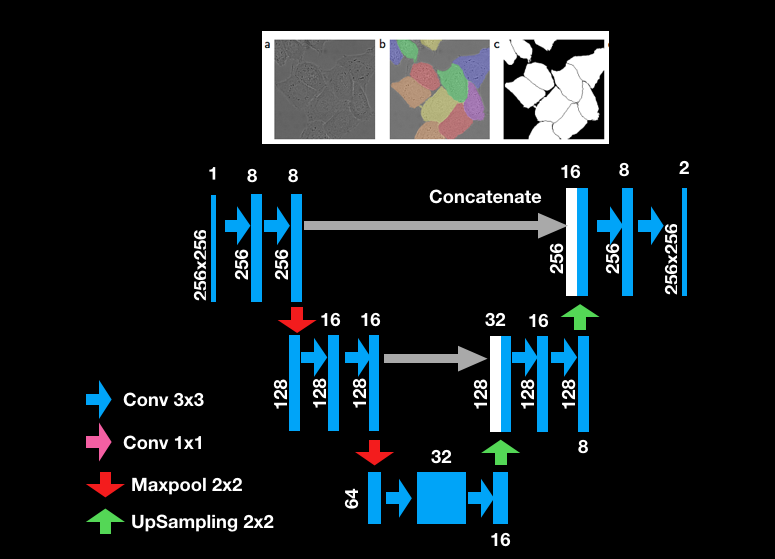

## Siamese Network
-  Apply the same NN twice (or more)
-  Aims at extracting meaningful features
-  Data from the same class should be map the location _close_ to each other , data from different classes should be _far_ from each other
    -  Need _distance_ calculation
    -  Keras does not have distance layer. Need a way to work around.
-  Idea similar to _LDA (Linear Discriminant Analysis)_ excepted that we use non-linear projection and LDA represents each class by its mean vector that may not be suitable for all cases.
-  For siamese network, we adjust the weights using pair of examples randomly drawn
-  __Contrastive loss__ 
    -  Data of the same class always attracted to each other
    -  Data from different class will push away only if they are close
    -  $L(y,d) = yd^2 + (1-y)\max\{0, m-d\}^2$ where $m$ is a margin, eg.=1
    -  This is also not a pre-defined loss, so we need to implement it by ourselves

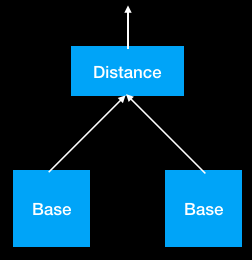

### The network construction

In [127]:
base = Sequential()
base.add( Dense(200, input_shape=(784,), activation='tanh') )
base.add( Dense(100, activation='tanh') )
base.add( Dense(2, activation='tanh') )
base.compile(loss='mean_squared_error', optimizer='adam')

# leg 1
x1 = Input(shape=(784,))
y1 = base(x1)

# leg 2
x2 = Input(shape=(784,))
y2 = base(x2)

# output Euclidean distance
from keras.layers import Subtract, Dot
z = Subtract()([y1, y2]) # z=y1-y2
t = Dot(1)([z,z]) # t = (y1-y2)**2

mod = Model(inputs=[x1, x2], outputs=[t])

### Custom loss 

In [128]:
def contrastive_loss(y, d):
    """ Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """
    margin = 1
    return K.mean(y * K.square(d) + (1 - y) * K.square(K.maximum(margin - d, 0)))

mod.compile(loss=contrastive_loss, optimizer='adam')

### Train on batch!

In [ ]:
# group exs of same class
XX = []
for t in range(10):
    XX.append(X_train[y_train==t])

nepochs = 20
bsize = 32
c = int(X_train.shape[0]/bsize)

for _ in range(nepochs):
    for _ in range(c):
        X1, X2, Y = [], [], []
        # sampling exs of same class
        for _ in range(16):
            t = np.random.randint(10)
            A = XX[t][np.random.randint(XX[t].shape[0], size=2)]
            X1.append(A[0])
            X2.append(A[1])
            Y.append(1)
        
        # sampling different class
        for _ in range(16):
            t = np.random.choice(10, size=2)
            t1, t2 = t[0], t[1]
            X1.append(XX[t1][np.random.randint(XX[t1].shape[0])])
            X2.append(XX[t2][np.random.randint(XX[t2].shape[0])])
            Y.append(0)
        
        X1 = np.array(X1)
        X2 = np.array(X2)
        mod.train_on_batch([X1, X2], Y)

### Exercise: build siamese network using CNN as base model

In [ ]:
...

## Break: t-SNE
-  __Embedding__ technique
-  Aim at finding new coordinates for each training data directly
-  Adjusting the coordinates such that the _distribution of distance to neighbors_ is similar to the original space
-  In each iteration, compute distribution in lower subspace then adjust the coordinates -> Slow

t-SNE from Raw pixels
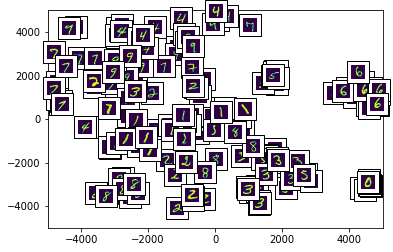

t-SNE from deep features (CNN in the first example)
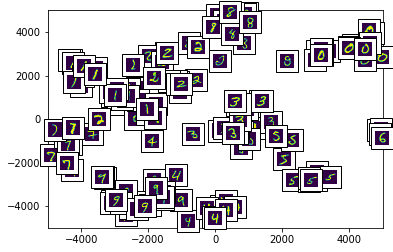

Result from siamese network
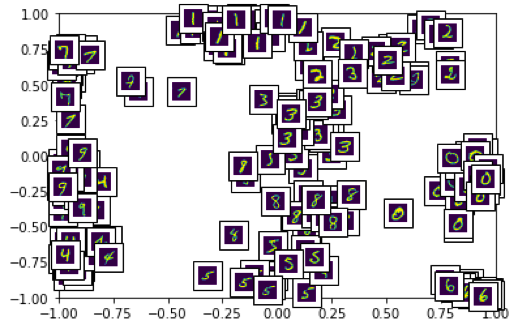

-  Exercise
    -  Let $x_1, ..., x_n$ be the original data and $y_1, ..., y_n$ be their embedded coordinates.
    -  Let $p$ be the distribution in the original space and $q$ be the distribution in the new space, the loss function $C$ is defined as the sum of the _Kullback-Leibler divergence_ between them.
    -  We have the following gradient $\frac{\partial C}{\partial y_i}  = \sum_j (p(j|i) - q(i|j) + p(i|j) - q(i|j))(y_i-y_j)$
    -  If $y_i \in \mathbb{R}^2$, then $\frac{\partial C}{\partial y_{i1}} = $?
    -  How should we adjust $y_i$?

In [ ]:
from sklearn.manifold import TSNE

XX = np.array(X_train[2000].reshape(2000, 784))
X_embedded = TSNE(n_components=2).fit_transform(XX)

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)
from skimage.transform import resize

fig, ax = plt.subplots()
for t in range(200):
    im = OffsetImage( resize(X_train[t], (14,14)) )
    im.image.axes = ax
    
    ab = AnnotationBbox(im, [X_embedded[t,0]*100,X_embedded[t,1]*100])
    ax.add_artist(ab)

# Fix the display limits to see everything
ax.set_xlim(-5000, 5000)
ax.set_ylim(-5000, 5000)
plt.show()

### Exercise: perform t-SNE using deep features

In [ ]:
...

# Recurrent Neural Network
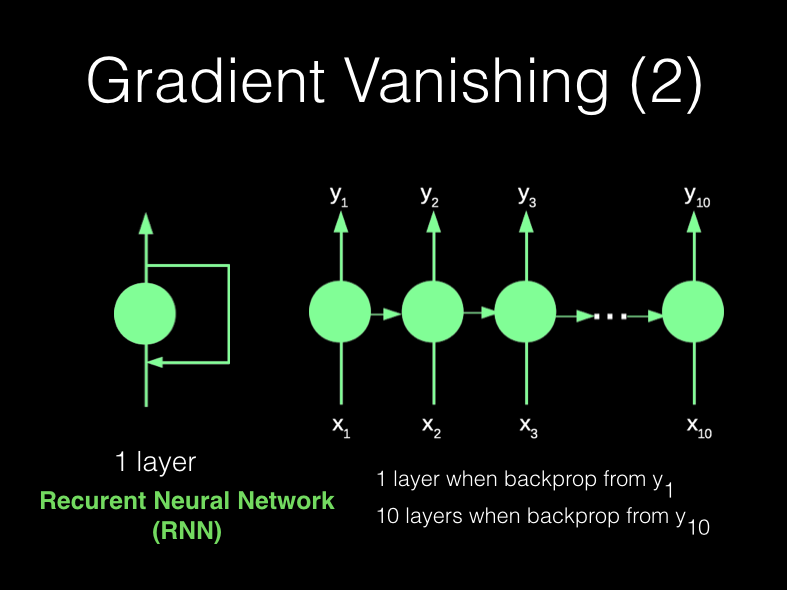
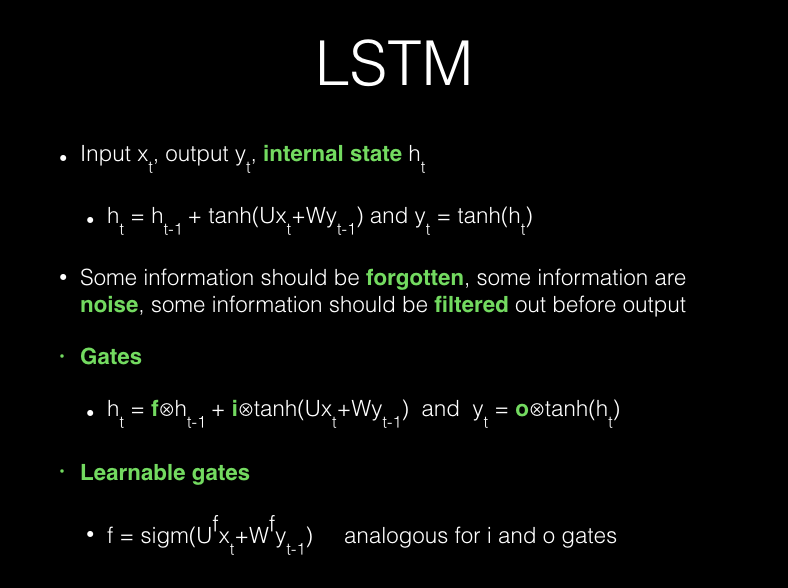

-  LSTM and other RNNs are used to capture _long term dependencies_ or _elastic stretching_ in images
    -  words dependency in language model
    -  sky or road areas in image
-  Can be mixed with normal Convolution layers
    -  Use _Permute_ and _TimeDistributed_ layer
-  CNN outputs probability of characters
-  LSTM post-processes and outputs sequence of characters
-  __Bi-directional RNN__
-  __Can we process sequential data with CNN?__

In [135]:
from keras.layers import (LSTM, TimeDistributed, Permute)

model = Sequential()
model.add( Conv2D(10, (3,3), activation='relu', padding='same', data_format='channels_first', input_shape=(1,28,28)) )

model.add(TimeDistributed(LSTM(10,return_sequences=True)))
model.add(Permute((1,3,2)))
model.add(TimeDistributed(LSTM(10,return_sequences=True)))

model.add(Flatten())
model.add( Dense(10, activation='softmax') )

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 10, 28, 28)        100       
_________________________________________________________________
time_distributed_10 (TimeDis (None, 10, 28, 10)        1560      
_________________________________________________________________
permute_5 (Permute)          (None, 10, 10, 28)        0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 10, 10, 10)        1560      
_________________________________________________________________
flatten_6 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                10010     
Total params: 13,230
Trainable params: 13,230
Non-trainable params: 0
_________________________________________________________________
None


### Exercise train this Conv+LSTM on MNIST and compute the test accuracy

In [136]:
...

Ellipsis

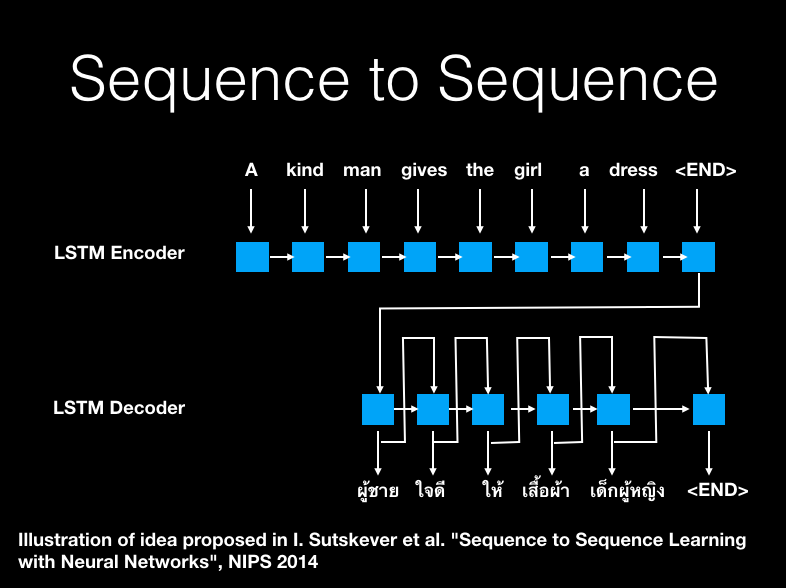

## Object detection
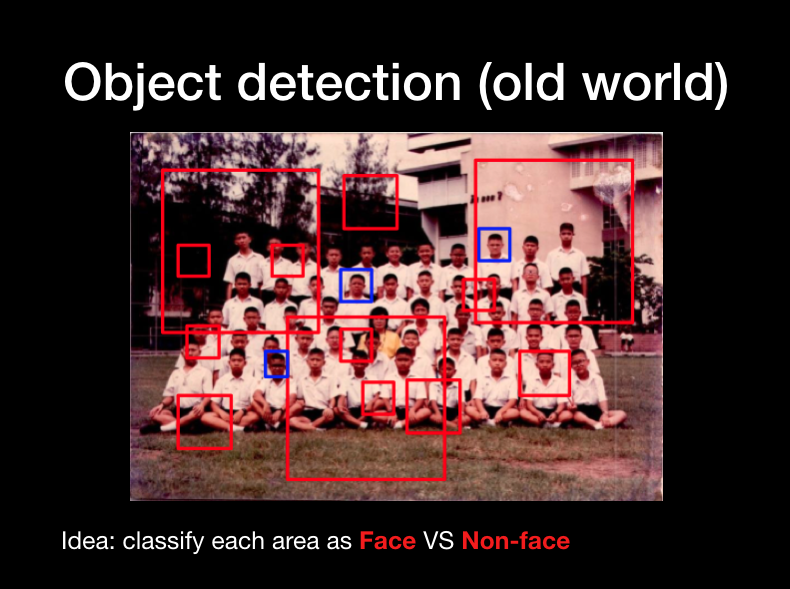
### New world
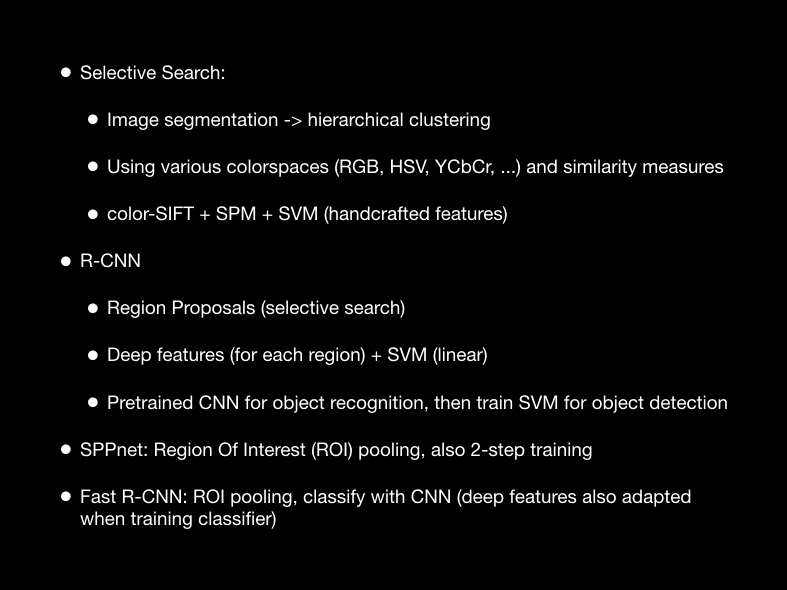
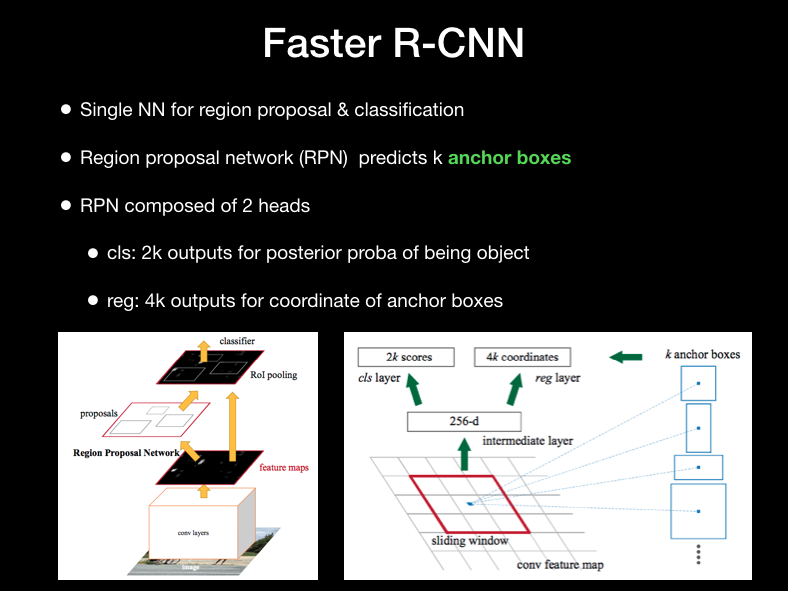
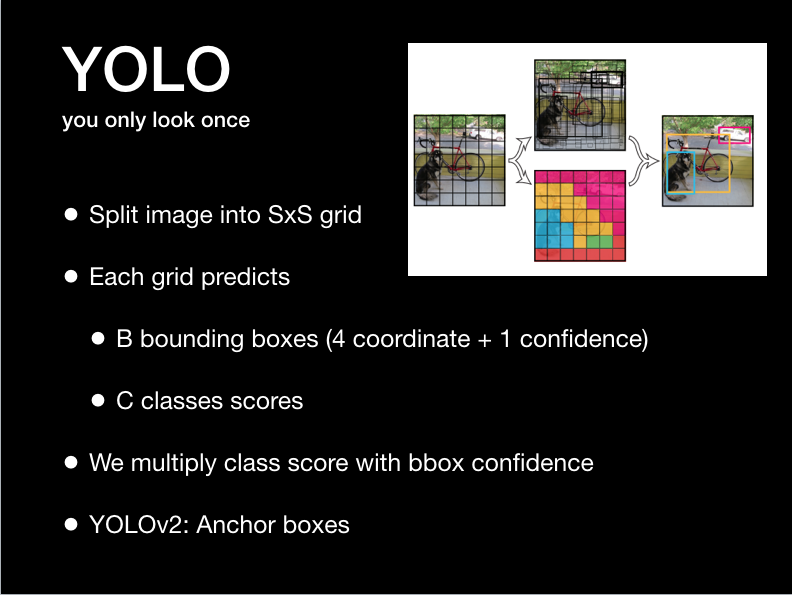
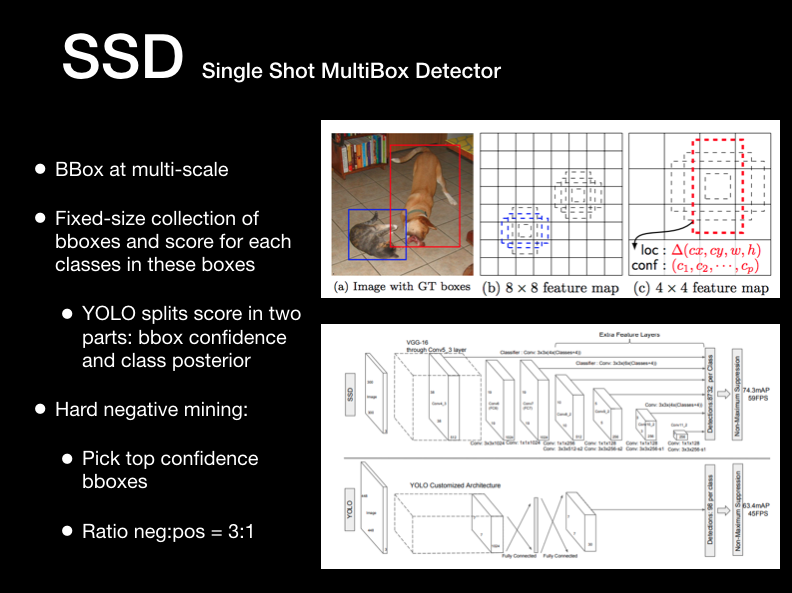